<a href="https://colab.research.google.com/github/avinashkpai12/Pytorch_Projects/blob/master/GANs_pytorch_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Creating a Simple GAN using MNIST Dataset

In [1]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


Setting up tansforms and Fetching MNIST Dataset

In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_set = torchvision.datasets.MNIST(root=".", train=True, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle= True)

In [4]:
samples, labels = next(iter(train_loader))

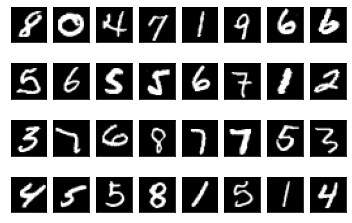

In [6]:
for i in range(32):
  ax = plt.subplot(4, 8, i+1)
  plt.imshow(samples[i].reshape(28, 28), cmap="gray")
  plt.xticks([])
  plt.yticks([])

In [7]:
# Defining the discriminator model
class Discriminator(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
          nn.Linear(784, 2048), #input the 28x28 image
          nn.ReLU(),
          nn.Dropout(0.3),
          nn.Linear(2048, 1024),
          nn.ReLU(),
          nn.Dropout(0.3),
          nn.Linear(1024, 512),
          nn.ReLU(),
          nn.Dropout(0.3),
          nn.Linear(512, 256),
          nn.ReLU(),
          nn.Dropout(0.3),
          nn.Linear(256, 1),
          nn.Sigmoid(),
    )

  def forward(self, x):
    x = x.view(x.size(0), 784)
    output = self.model(x)
    return output

# create an instance of the discriminator model
discriminator = Discriminator().to(device=device)

In [8]:
# Creating the generator model
class Generator(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(100, 256),
        nn.ReLU(),
        nn.Linear(256, 512),
        nn.ReLU(),
        nn.Linear(512, 1024),
        nn.ReLU(),
        nn.Linear(1024, 784),
        nn.Tanh(), #Use tanh so that the ouputs lie between -1 and 1
    )

  def forward(self, x):
    output = self.model(x)
    output = output.view(x.size(0), 1, 28, 28) #output of the generator is the i/p to Discriminator size(28x28)
    return output

generator = Generator().to(device=device)

In [11]:
# Setting up training parameters and optimizer
lr = 0.0001
epochs = 50
loss_function = nn.BCELoss() # Binary cross entropy loss
batch_size = 32

optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [15]:
# Traning Step
for epoch in range(epochs):
  for n, (samples, labels) in enumerate(train_loader):
    # Get data for training the discriminator
    samples = samples.to(device=device)
    sample_labels = torch.ones((batch_size, 1)).to(device=device)
    latent_space_samples = torch.randn((batch_size, 100)).to(device=device)
    generated_samples = generator(latent_space_samples)
    generated_sample_labels = torch.zeros((batch_size, 1)).to(device=device)
    all_samples = torch.cat((samples, generated_samples))
    all_samplel_labels = torch.cat((sample_labels, generated_sample_labels))

    # Training the discriminator
    discriminator.zero_grad()
    output_discriminator = discriminator(all_samples)
    loss_discriminator = loss_function(output_discriminator, all_samplel_labels)
    loss_discriminator.backward()
    optimizer_discriminator.step()

    # Data for training the generator
    latent_sapce_samples = torch.randn((batch_size, 100)).to(device=device)

    # Training the generator
    generator.zero_grad()
    generated_samples = generator(latent_space_samples)
    output_discriminator_generated = discriminator(generated_samples)
    loss_generator = loss_function(output_discriminator_generated, sample_labels)
    loss_generator.backward()
    optimizer_generator.step()

    # Ouput the loss
    if n == batch_size -1:
      print(f"Epoch: {epoch} Discriminated Loss: {loss_discriminator}")
      print(f"Epoch: {epoch} Generated Loss: {loss_generator}")


Epoch: 0 Discriminated Loss: 0.5048233270645142
Epoch: 0 Generated Loss: 0.7569548487663269
Epoch: 1 Discriminated Loss: 0.008476288989186287
Epoch: 1 Generated Loss: 6.613347053527832
Epoch: 2 Discriminated Loss: 0.003735603066161275
Epoch: 2 Generated Loss: 8.026902198791504
Epoch: 3 Discriminated Loss: 0.0055959997698664665
Epoch: 3 Generated Loss: 9.032051086425781
Epoch: 4 Discriminated Loss: 0.014734391123056412
Epoch: 4 Generated Loss: 5.404714584350586
Epoch: 5 Discriminated Loss: 0.057401157915592194
Epoch: 5 Generated Loss: 4.187487602233887
Epoch: 6 Discriminated Loss: 0.12082396447658539
Epoch: 6 Generated Loss: 3.4462778568267822
Epoch: 7 Discriminated Loss: 0.29157352447509766
Epoch: 7 Generated Loss: 2.6723523139953613
Epoch: 8 Discriminated Loss: 0.13227184116840363
Epoch: 8 Generated Loss: 2.939744472503662
Epoch: 9 Discriminated Loss: 0.3253824710845947
Epoch: 9 Generated Loss: 2.3800034523010254
Epoch: 10 Discriminated Loss: 0.22443787753582
Epoch: 10 Generated Loss:

In [16]:
# Check to see the generated samples
latent_sapce_samples = torch.randn((batch_size, 100)).to(device=device)
generated_samples = generator(latent_space_samples)

torch.Size([32, 1, 28, 28])


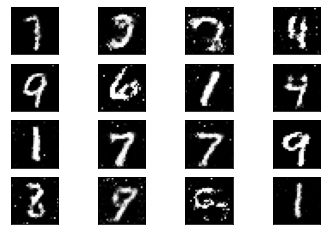

In [17]:
# plotting the generated samples
generated_samples = generated_samples.cpu().detach()
print(generated_samples.shape)
for i in range(16):
  ax = plt.subplot(4, 4, i+1)
  plt.imshow(generated_samples[i].reshape(28, 28), cmap="gray")
  plt.xticks([])
  plt.yticks([])